# Resultados preliminares TCC - Data Science

Análise preliminar dos dados clínicos de paciente com leucemia mielóide aguda (LMA). Os dados clinicos foram extraidos diretamente do site do projeto TARGET, são dados públicos seguindo o link  para acesso: 
__[Dados Clinicos LMA](https://target-data.nci.nih.gov/Public/AML/clinical/)__

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
df_clin = pd.read_excel("clinical.xlsx")

In [83]:
df_clin.head
df_clin.columns

Index(['TARGET USI', 'Gender', 'Race', 'Ethnicity', 'Age at Diagnosis in Days',
       'First Event', 'Event Free Survival Time in Days', 'Vital Status',
       'Overall Survival Time in Days', 'Year of Diagnosis',
       'Year of Last Follow Up', 'Protocol', 'WBC at Diagnosis',
       'Bone marrow leukemic blast percentage (%)', 'Peripheral blasts (%)',
       'CNS disease', 'Chloroma', 'FAB Category', 't(6;9)', 't(8;21)',
       't(3;5)(q25;q34)', 't(6;11)(q27;q23)', 't(9;11)(p22;q23)',
       't(10;11)(p11.2;q23)', 't(11:19)(q23:p13.1)', 'inv(16)', 'del5q',
       'del7q', 'del9q', 'monosomy 5', 'monosomy 7', 'trisomy 8', 'trisomy 21',
       'MLL', 'Minus Y', 'Minus X', 'Cytogenetic Code Other',
       'Cytogenetic Complexity', 'Primary Cytogenetic Code', 'ISCN',
       'FLT3/ITD positive?', 'FLT3/ITD allelic ratio', 'FLT3 PM',
       'NPM mutation', 'CEBPA mutation', 'WT1 mutation',
       'c-Kit Mutation Exon 8', 'c-Kit Mutation Exon 17',
       'MRD at end of course 1', 'MRD % a

O data set de dados clinicos contém muitas variáveis e nem todas é do nosso interesse para as análises, como os dados de mutações, então vamos selecionar somente as variáveis que são do interesse da nossa anáise de expressão de miRNA. 

In [84]:
df_selec = df_clin [['TARGET USI', 'Gender', 'Race', 'Ethnicity', 'Age at Diagnosis in Days',
       'First Event', 'Event Free Survival Time in Days', 'Vital Status',
       'Overall Survival Time in Days', 'Year of Last Follow Up', 'WBC at Diagnosis',
       'Bone marrow leukemic blast percentage (%)', 'Peripheral blasts (%)',
       'CNS disease']]

In [85]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   TARGET USI                                 733 non-null    object 
 1   Gender                                     733 non-null    object 
 2   Race                                       733 non-null    object 
 3   Ethnicity                                  733 non-null    object 
 4   Age at Diagnosis in Days                   733 non-null    int64  
 5   First Event                                733 non-null    object 
 6   Event Free Survival Time in Days           733 non-null    int64  
 7   Vital Status                               733 non-null    object 
 8   Overall Survival Time in Days              733 non-null    int64  
 9   Year of Last Follow Up                     733 non-null    int64  
 10  WBC at Diagnosis          

Algumas variáveis númericas estão dispostas em dias, então vamos passar idade para anos e as sobrevidas para meses

In [135]:
df_selec["idade"] = df_selec["Age at Diagnosis in Days"].div(365).round()
df_selec["evento_sobrevida"] = df_selec["Event Free Survival Time in Days"].div(30).round(2)
df_selec["sobrevida"] = df_selec["Overall Survival Time in Days"].div(30).round(2)

C:\Users\carol\AppData\Local\Temp\ipykernel_3476\4040833211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selec["idade"] = df_selec["Age at Diagnosis in Days"].div(365).round()
C:\Users\carol\AppData\Local\Temp\ipykernel_3476\4040833211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selec["evento_sobrevida"] = df_selec["Event Free Survival Time in Days"].div(30).round(2)
C:\Users\carol\AppData\Local\Temp\ipykernel_3476\4040833211.py:3: SettingWithCopyWarning: 
A value is trying to be set on

        Gender     %
Male       387  52.8
Female     346  47.2


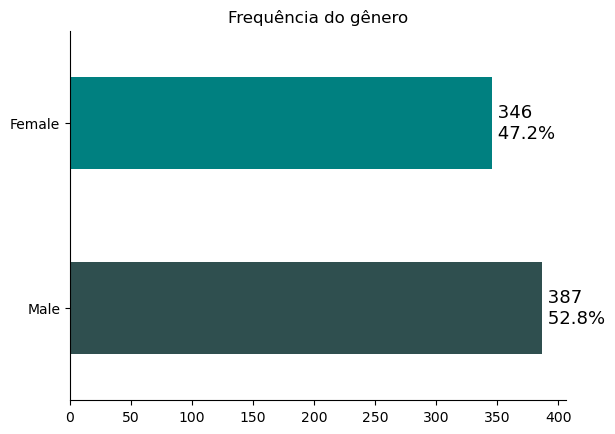

In [113]:
df_g=pd.DataFrame(df_selec["Gender"].value_counts())

df_g['%'] = df_g.Gender.div(df_g.Gender.sum()).mul(100).round(2)

print(df_g)

ax = df_g.plot(kind='barh', y='Gender', legend= False, color= ["darkslategray", "teal"],
             title='Frequência do gênero')

labels = [f' {v.get_width()}\n {df_g.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]

ax.bar_label(ax.containers[0], labels=labels, size=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


                                           Race      %
White                                       511  69.71
Black or African American                    91  12.41
Unknown                                      80  10.91
Asian                                        41   5.59
American Indian or Alaska Native              6   0.82
Native Hawaiian or other Pacific Islander     4   0.55


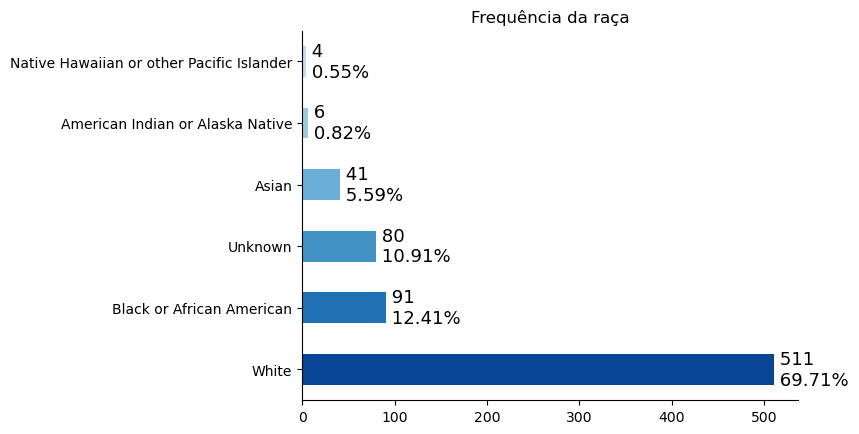

In [121]:
df_g=pd.DataFrame(df_selec["Race"].value_counts())

df_g['%'] = df_g.Race.div(df_g.Race.sum()).mul(100).round(2)

print(df_g)

ax = df_g.plot(kind='barh', y='Race', legend= False, color= ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef'],
             title='Frequência da raça')

labels = [f' {v.get_width()}\n {df_g.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]

ax.bar_label(ax.containers[0], labels=labels, size=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


                        Ethnicity      %
Not Hispanic or Latino        580  79.13
Hispanic or Latino            128  17.46
Unknown                        25   3.41


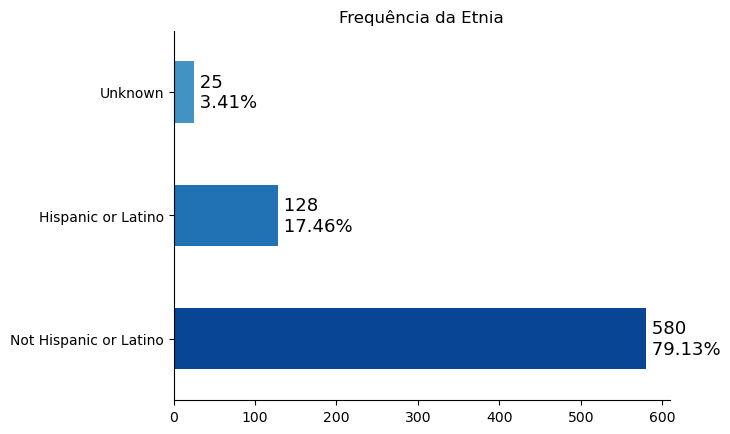

In [122]:
df_g=pd.DataFrame(df_selec["Ethnicity"].value_counts())

df_g['%'] = df_g.Ethnicity.div(df_g.Ethnicity.sum()).mul(100).round(2)

print(df_g)

ax = df_g.plot(kind='barh', y='Ethnicity', legend= False, color= ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef'],
             title='Frequência da Etnia')

labels = [f' {v.get_width()}\n {df_g.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]

ax.bar_label(ax.containers[0], labels=labels, size=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


                         First Event      %
Relapse                          328  44.75
Censored                         261  35.61
Induction failure                 68   9.28
Death                             57   7.78
Death without remission           19   2.59


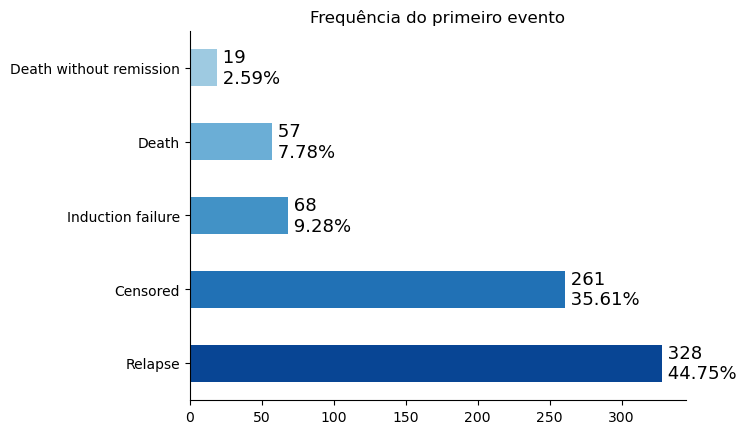

In [143]:
df_g=pd.DataFrame(df_selec["First Event"].value_counts())

df_g['%'] = df_g['First Event'].div(df_g['First Event'].sum()).mul(100).round(2)

print(df_g)

ax = df_g.plot(kind='barh', y='First Event', legend= False, color= ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef'],
             title='Frequência do primeiro evento')

labels = [f' {v.get_width()}\n {df_g.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]

ax.bar_label(ax.containers[0], labels=labels, size=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Então pelas frequências das váriveis categoricas podemos observar uma maior freqência de pacientes com LMA é do gênero masculino, da raça branca, cuja etinia é não hispanica ou latina e o primeiro evento registrado é a recidiva. 

In [140]:
df_selec["idade"].describe()

count    733.000000
mean       9.714870
std        6.655805
min        0.000000
25%        3.000000
50%       10.000000
75%       15.000000
max       30.000000
Name: idade, dtype: float64

In [141]:
df_selec["evento_sobrevida"].describe()

count    733.000000
mean      24.443574
std       23.573247
min        0.000000
25%        6.300000
50%       13.270000
75%       40.700000
max       90.170000
Name: evento_sobrevida, dtype: float64

In [142]:
df_selec["sobrevida"].describe()

count    733.000000
mean      33.274884
std       23.904408
min        0.030000
25%       11.300000
50%       29.930000
75%       53.100000
max       90.170000
Name: sobrevida, dtype: float64

A análise descritivas das váriaveis quantitativas mostrou a média de idade é de 9 anos a sobrevida livre de eventos tem média de 24 meses e a sobrevida global média de 33 meses. Agora o proximo passo é cruzar essas variáveis e realizar testes estátisicos de significância 